In [1]:
# Import our dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

## Creating Initial DataFrame

In [2]:
# Import our csv file

file = "Resources/mba_decision_dataset.csv"
decision_df = pd.read_csv(file)
decision_df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


### Creating a Gender based DataFrame

In [3]:
#Create a gender-specific dataframe

gender_based_df= decision_df[["Person ID","Age","Gender","Decided to Pursue MBA?","Current Job Title","Annual Salary (Before MBA)","Years of Work Experience","Expected Post-MBA Salary","Reason for MBA","Has Management Experience"]]
gender_based_df.head()

,Person ID,Age,Gender,Decided to Pursue MBA?,Current Job Title,Annual Salary (Before MBA),Years of Work Experience,Expected Post-MBA Salary,Reason for MBA,Has Management Experience
0,1,27,Male,Yes,Entrepreneur,90624,8,156165,Entrepreneurship,No
1,2,24,Male,No,Analyst,53576,4,165612,Career Growth,Yes
2,3,33,Female,No,Engineer,79796,9,122248,Skill Enhancement,No
3,4,31,Male,No,Manager,105956,1,123797,Entrepreneurship,No
4,5,28,Female,Yes,Entrepreneur,96132,9,197509,Skill Enhancement,No


#### Analysis 1 - MBA V/S Gender

In [4]:
MBA_pursuers = gender_based_df.loc[gender_based_df["Decided to Pursue MBA?"] == "Yes"]
MBA_pursuers

,Person ID,Age,Gender,Decided to Pursue MBA?,Current Job Title,Annual Salary (Before MBA),Years of Work Experience,Expected Post-MBA Salary,Reason for MBA,Has Management Experience
0,1,27,Male,Yes,Entrepreneur,90624,8,156165,Entrepreneurship,No
4,5,28,Female,Yes,Entrepreneur,96132,9,197509,Skill Enhancement,No
7,8,27,Male,Yes,Engineer,100072,6,199447,Entrepreneurship,Yes
8,9,30,Female,Yes,Entrepreneur,118689,6,76037,Career Growth,Yes
9,10,23,Female,Yes,Entrepreneur,112387,3,92294,Entrepreneurship,No
...,...,...,...,...,...,...,...,...,...,...
9993,9994,25,Male,Yes,Entrepreneur,76025,8,86385,Skill Enhancement,No
9994,9995,23,Male,Yes,Entrepreneur,92456,7,135949,Networking,Yes
9995,9996,33,Female,Yes,Analyst,109172,5,69000,Networking,Yes
9997,9998,31,Female,Yes,Manager,34152,8,100806,Networking,Yes


In [5]:
#Value counts of the gender
gender_data_df = MBA_pursuers["Gender"].value_counts()
gender_data_df

Gender
Male      2983
Female    2643
Other      281
Name: count, dtype: int64

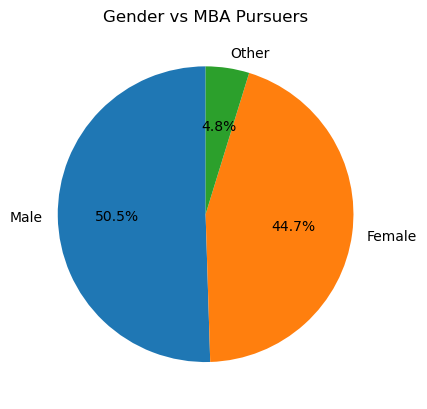

In [6]:
# Create a pie-chart showing gender that was more keen on pursuing the MBA

gender_data_df.plot.pie(y = gender_data_df,labels = gender_data_df.index, autopct = "%1.1f%%", startangle=90)

plt.title("Gender vs MBA Pursuers")
plt.ylabel("")
plt.show()

#### Report - 1


The above analysis provides a closer look at the role of gender in likelihood of pursuing MBA. The analysis provides the following observation:-

Gender
Male      2983 (50.5%)
Female    2643 (44.7%)
Other      281 (4.8%)

The observation reiterates and substantiates that more and more females are entering the finance field. It no more remains a male-dominated career as women as equally participating in it.

#### Analysis - 2 

This analysis tries bring forth the average age when the individuals are more probable to enroll in the MBA courses. And does age play a part in enrolling the MBA courses.

In [7]:
# Here to show the maximum and the minimun age of the individuals joining the MBA course

age_df= gender_based_df.groupby("Gender")["Age"].agg(["max", "min"])

age_df

,max,min
Gender,,
Female,34,21
Male,34,21
Other,34,21


In [8]:
#grouby age 
per_age_df =gender_based_df.groupby(["Gender"])["Age"].mean()
per_age_df


Gender
Female    27.473094
Male      27.539129
Other     27.209850
Name: Age, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

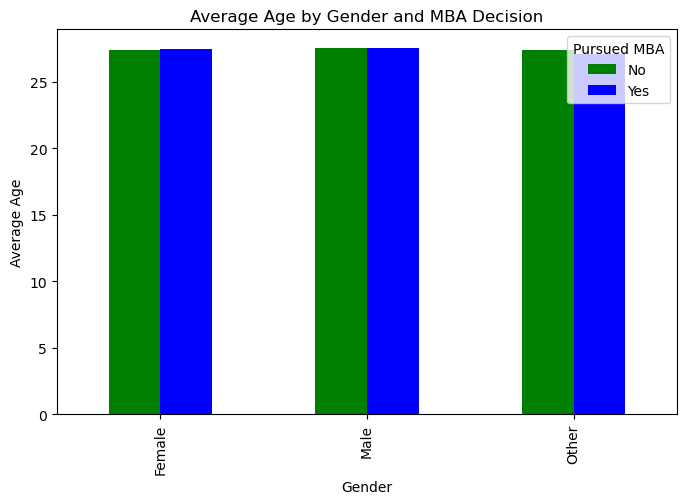

In [9]:
# Create a bar chart that presents a comaprision between the age of the applicant and pursuing MBA

age_comparision = gender_based_df.groupby(["Gender", "Decided to Pursue MBA?"])["Age"].mean().unstack()

#plot a bar cahrt
age_comparision.plot(kind="bar", figsize =(8,5), color=["green","blue"])

plt.xlabel("Gender")
plt.ylabel("Average Age")
plt.title("Average Age by Gender and MBA Decision")
plt.legend(title="Pursued MBA", labels = ["No", "Yes"])
plt.show

#### Report - 2 


In the second analysis, there is an attempt to put forth if the age influenced the participants decision to enroll in the MBA courses. The individals that enrolled in the course, their age ranged from early 20's to early 30's. The youngest being 21 years old among all genders and 34 years old being the oldest among all genders. And in the analysis above the mean age of the individuals enrolling in the MBA courses is 27 years of age among all genders. 
Gender
Female    27.473094
Male      27.539129
Other     27.209850

#### Analysis - 3

The subsequent analysis shows the change in the salaries of the individuals before and after enrolling in the MBA courses, that is a powerful motivator to pursue the MBA degree.

In [10]:
#grouby salaries before MBA
per_salaries_df =gender_based_df.groupby(["Gender"])["Annual Salary (Before MBA)"].mean()
per_salaries_df



Gender
Female    75445.644170
Male      75044.583284
Other     73822.955032
Name: Annual Salary (Before MBA), dtype: float64

In [11]:
#grouby salaries after MBA
per_salaries1_df =gender_based_df.groupby(["Gender"])["Expected Post-MBA Salary"].mean()
per_salaries1_df


Gender
Female    130626.802691
Male      129936.032131
Other     131587.276231
Name: Expected Post-MBA Salary, dtype: float64

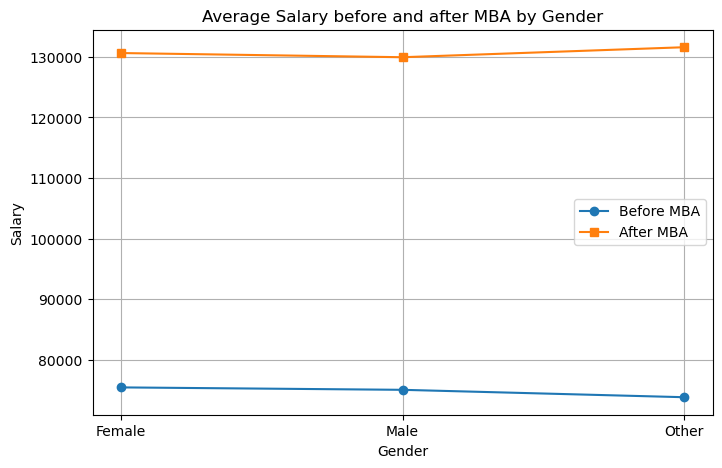

In [12]:
#Create a line chart showing the average salaries before the applicants pursued MBA

gender_salary = decision_df.groupby("Gender")[["Annual Salary (Before MBA)", "Expected Post-MBA Salary"]].mean()

#Plot the data
plt.figure(figsize=(8,5))
plt.plot(gender_salary.index, gender_salary["Annual Salary (Before MBA)"], marker = 'o', label="Before MBA")
plt.plot(gender_salary.index, gender_salary["Expected Post-MBA Salary"], marker ='s', label= "After MBA")

#labels
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Average Salary before and after MBA by Gender")
plt.legend()
plt.grid("True")



#Show plot
plt.show()

### Report - 3

The monetary benefit i.e., the salary increase is a strong motivator for individuals to pursue MBA. There is a significant rise in the salaries of indivduals after pursuing the MBA courses. The average increase among the genders more or less remains the same. The average rise being close to $55,000 approx.
The average salary among the genders before MBA is as follows:-
Gender:
Female    75445.644170
Male      75044.583284
Other     73822.955032

The average salary among the genders post MBA is as follows:-
Gender:
Female    130626.802691
Male      129936.032131
Other     131587.276231


### Analysis - 4

The following analysis tries to show the role of previous management experience has on the individuals (based on gender) willingness to pursue MBA. 

In [13]:
gender_data_df_1 = MBA_pursuers["Has Management Experience"].value_counts()
gender_data_df_1

Has Management Experience
No     3566
Yes    2341
Name: count, dtype: int64

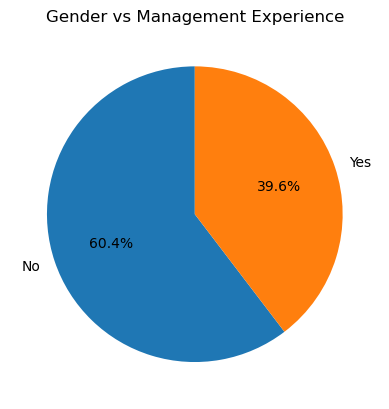

In [14]:
# Create a pie-chart showing gender that was more keen on pursuing the MBA

gender_data_df_1.plot.pie(y = MBA_pursuers,labels = gender_data_df_1.index, autopct = "%1.1f%%", startangle=90)

plt.title("Gender vs Management Experience")
plt.ylabel("")
plt.show()

### Report - 4

The above analysis presents that the individauls without management experience were slightly more likely to enroll in the MBA courses. The results were as follows:-

Has Management Experience:
No     3566 (60.4%)
Yes    2341 (39.6%)

### Analysis - 5

The following analysis shows the years of work experience an individual has before they enroll in the MBA courses.

In [15]:
# Count of the Years of Experience
gender_data_df_2 = MBA_pursuers["Years of Work Experience"].value_counts()
gender_data_df_2

Years of Work Experience
6    618
4    607
7    604
1    599
8    594
5    593
2    580
9    573
0    571
3    568
Name: count, dtype: int64

In [16]:
# Average work experience individuals before enrolling in the MBA course
workexperience_comparision = MBA_pursuers.groupby(["Gender"])["Years of Work Experience"].mean()
workexperience_comparision

Gender
Female    4.508135
Male      4.538719
Other     4.437722
Name: Years of Work Experience, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

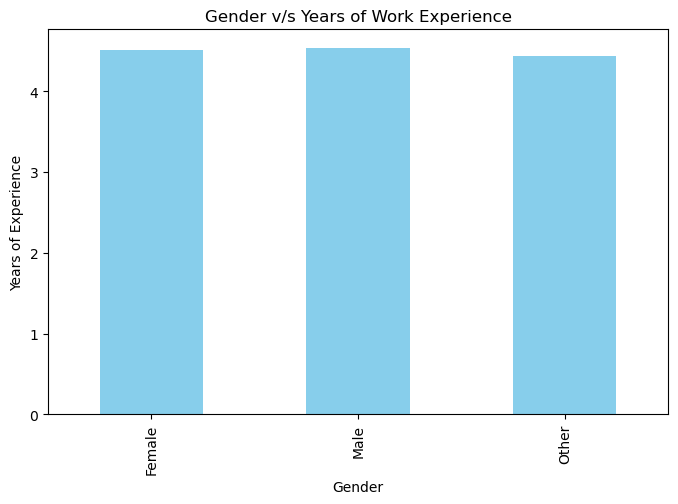

In [17]:
# Create a bar chart that presents a comaprision between the gender and the years of work experience of the applicant in pursuing MBA

workexperience_comparision = MBA_pursuers.groupby(["Gender"])["Years of Work Experience"].mean()

#plot a bar chart
workexperience_comparision.plot(kind="bar", figsize =(8,5), color=["skyblue"])

plt.xlabel("Gender")
plt.ylabel("Years of Experience")
plt.title("Gender v/s Years of Work Experience")
plt.show

### Report - 5


The comparision between between the work experience and the enrollment in the MBA courses does not present a clear outcome. There is an average work experience of 4 years among all the genders. The work experience ranges between 1 to 9 years. The results are follows:-

Gender
Female    4.508135
Male      4.538719
Other     4.437722

Years of Work Experience
6    618
4    607
7    604
1    599
8    594
5    593
2    580
9    573
0    571
3    568